# **IMPORT DATA PROCEDURE OF EEG SIGNAL**

**Import Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import math 
from tabulate import tabulate
from cmath import exp,pi
from numpy.fft import fft, ifft

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
column_names =['EEG']
data = pd.read_csv('/content/drive/MyDrive/EEG 5 8 menit.txt',names=column_names)
EEG1 = data["EEG"]
data

,EEG
0,1.070183
1,1.023443
2,1.118534
3,1.099999
4,1.158021
...,...
275413,1.067765
275414,1.057289
275415,1.049230
275416,1.132234


**Sampling Frequency**

In [4]:
fs=input("FREQUENCY SAMPLING OF EMG SIGNAL :")
fs=float(fs)

FREQUENCY SAMPLING OF EMG SIGNAL :512


**INPUT SIGNAL MORPHOLOGY**

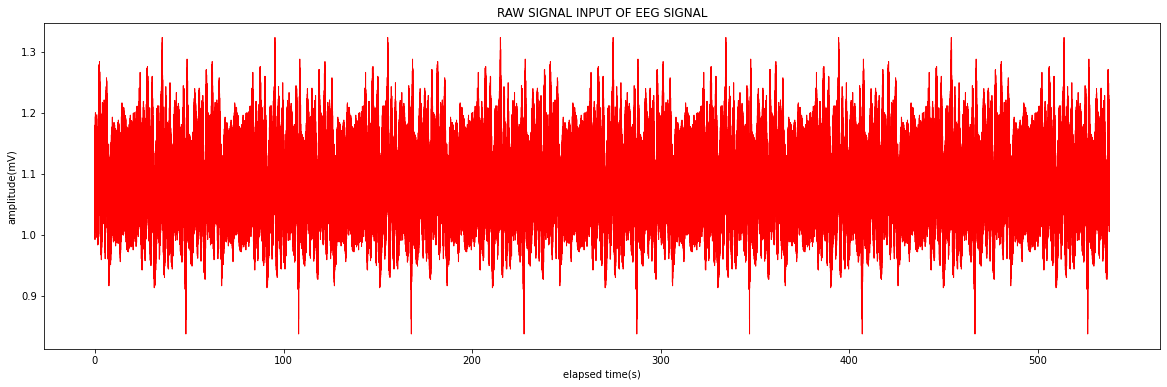

In [5]:
for n in range (len(EEG1)):
  n = np.arange(0,len(EEG1),1,dtype=int)
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((n/fs),EEG1,color='RED',linewidth=1)
plot.title('RAW SIGNAL INPUT OF EEG SIGNAL')
plot.xlabel("elapsed time(s)")
plot.ylabel("amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**OFFSET VOLTAGE CALCULATION PROCEDURE**

In [6]:
sum = 0
for n in range(len(EEG1)):
  sum += EEG1[n]
offset_voltage = sum/len(EEG1)
offset_voltage

1.0871581694529933

**BASELINE RESTORATION PROCEDURE**

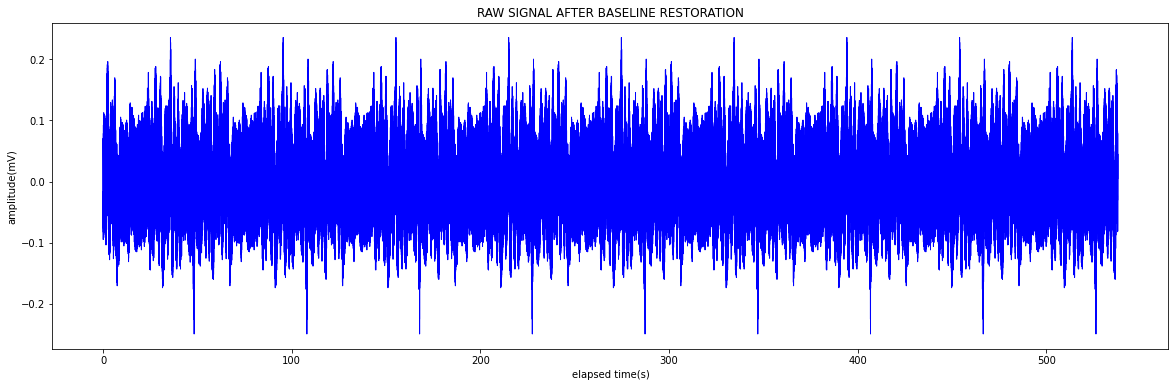

In [7]:
y1 = EEG1 - offset_voltage
for n in range (len(EEG1)):
  n = np.arange(0,len(EEG1),1,dtype=int)
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((n/fs),y1,color='blue',linewidth=1)
plot.title('RAW SIGNAL AFTER BASELINE RESTORATION')
plot.xlabel("elapsed time(s)")
plot.ylabel("amplitude(mV)")
fig.set_size_inches(w=20,h=6)

**LOWPASS FILTER ORDE-4**

In [8]:
# PROTOCOL FOR DATA [-N]
lpf_eeg = np.zeros(np.size(EEG1))
for n in range (5):
  lpf_eeg[-n] = lpf_eeg[0]
  y1[-n] =  y1[0]

In [9]:
lpf_eeg = np.zeros(np.size(y1))
for n in range (np.size(EEG1)):
  lpf_eeg[n] = 0.0031*y1[n] + 0.0124*y1[n-1] + 0.0186*y1[n-2] + 0.0124*y1[n-3] + 0.0031*y1[n-4] + 2.5649*lpf_eeg[n-1] - 2.6390*lpf_eeg[n-2] + 1.2556*lpf_eeg[n-3] - 0.2310*lpf_eeg[n-4]
a = (lpf_eeg)*2  
a

array([-0.00168394, -0.00629285, -0.01423995, ...,  0.        ,
        0.        ,  0.        ])

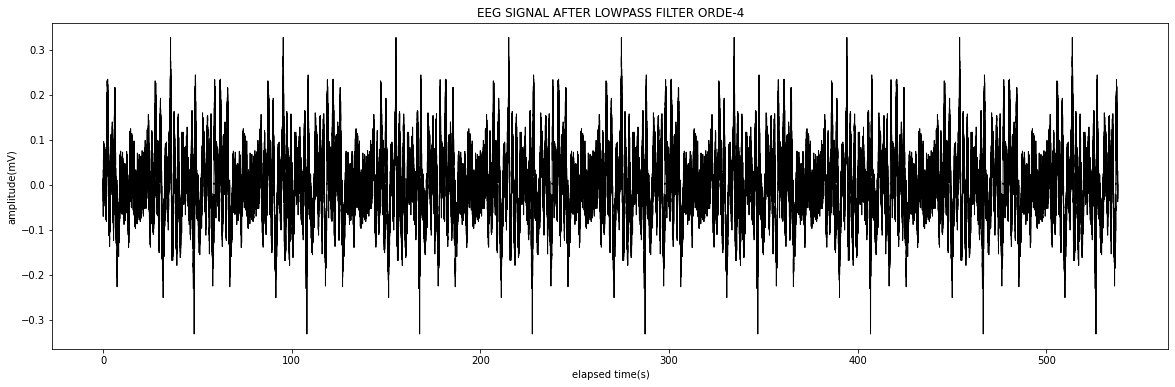

In [10]:
for n in range (len(lpf_eeg)):
  n = np.arange(0,len(lpf_eeg),1,dtype=int)
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.plot((n/fs),a,color='black',linewidth=1)
plot.title('EEG SIGNAL AFTER LOWPASS FILTER ORDE-4')
plot.xlabel("elapsed time(s)")
plot.ylabel("amplitude(mV)")
fig.set_size_inches(w=20,h=6)

# **EEG SIGNAL PROCESSING AND ANALYSIS**

**FOURIER TRANSFORM PROCEDURE**

In [11]:
D = np.fft.fft(a)
D_mag = np.abs(D)/len(a)
D_mag

array([1.35081339e-07, 1.34201917e-07, 1.31504505e-07, ...,
       1.26792966e-07, 1.31504505e-07, 1.34201917e-07])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


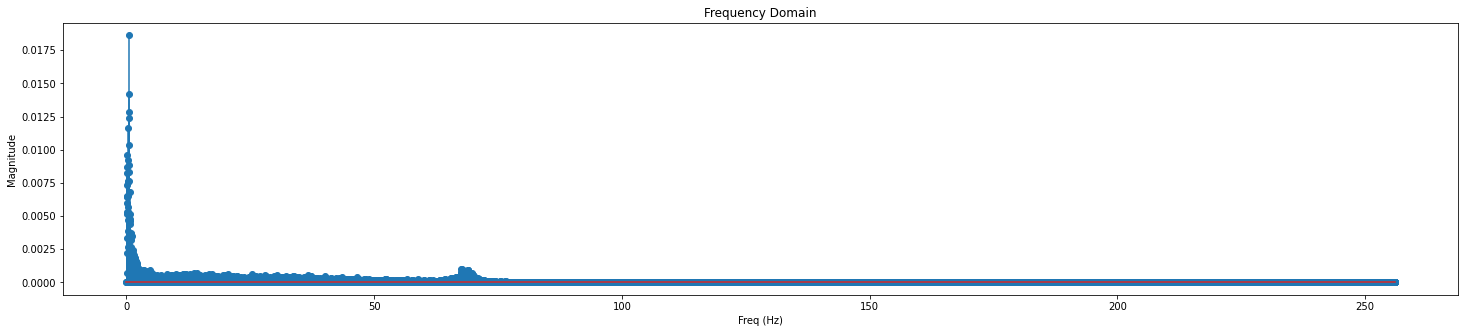

In [12]:
for k in range (1,(np.size(EEG1))-1):
 k = np.arange(1,np.ceil(np.size(EEG1)/2),1,dtype=int)
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.stem(k*fs/(np.size(D_mag)), D_mag[k])
plot.xlabel("Freq (Hz)")
plot.ylabel("Magnitude")
plot.title("Frequency Domain")
plot.show()
fig.set_size_inches(w=20,h=6)

In [15]:
sum1 = 0
sum2 = 0
# # for n in range (100):
# for n in (n+1 for n in range(100)):
# for n in range (round(len(lpf_eeg)/2)):
# for n in range (1795):
for n in range (14360):  
  sum1 += ((n*fs/len(lpf_eeg))*D_mag[n])
  sum2 += (D_mag[n])
MPF = sum1/sum2
MPF

8.45214453603936